In [1]:
import pandas as pd
import numpy as np
import find_citation
import networkx as nx
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/kevingmagana/DSI/capstone/external_data/first_merged_case_law.csv', sep='\t', encoding='utf-8')

In [3]:
data = df.case_text[df.case_text.notnull()]

document = data[1]

In [4]:
print (len(data)), (type(data))

ay= '(1979)'
ay.replace('(', '').replace(')', '')


import re
I = "Cir.2006)"
s = re.search(r"\d+(\.\d+)?", I)
s.group(0)


4527


'2006'

In [4]:
# citations = find_citation()


# print(new_list[0])

def get_citation(citation): 
    """
    :param citation: string, a full citation
    :returns: string, a partial citation to serve as the nodes

    EX: 
        Baker v. McCollan (1979)
        Graham v. Connor (1989)
        Austin v. Hamilton (1991)
    
    """
    cite = []
    for ind, word in enumerate(citation.split(' ')): 
        if ind == 0 or ind == 1 or ind == 2:
            cite.append(word.strip(','))
        try: 
            s = re.search(r"\d+(\.\d+)?", word)
            year= int(s.group(0))            
            if year > 1750 and year <= 2018 and ind > (len(citation.split(' ')))* .80: 
                year= "(", str(year), ")"
                year= "".join(year)
                cite.append(year)
        except: 
            continue
    return " ".join(cite)
    

def get_all_citations(document): 
    """
    :param document: string, legal document with citations
    :returns: list, a list of all citations
    
    """
    citations_objects = find_citation.get_citations(document, html=False)
    citations_strings=[]
    
    for obj in citations_objects:
        citations_strings.append(str(obj))
    
    results=[]
    for citation in citations_strings: 
        results.append(get_citation(citation))
    
    return results

get_all_citations(data[1000])

['States v. Rivera–Ventura',
 'States v. Acevedo',
 'States v. Williams',
 'States v. Ambriz–Ambriz',
 'States v. Angeles–Mascote',
 'Shaughnessy v. United',
 'Zavydas v. Davis',
 'United States v.1903',
 'States v. Williams',
 'States v. Angeles–Mascote',
 'States v. Canals–Jimenez',
 'States v. Zavala–Mendez',
 'Correa v. Thornburgh',
 'States v. Champegnie',
 'Morissette v. United',
 'Liparota v. United',
 "Ass'n v. United",
 'States v. Newton',
 'States v. Rodriguez',
 'States v. Martus',
 'States v. Salazar–Robles',
 'States v. Salazar–Robles',
 'States v. Hernandez–Noriega',
 'States v. Dixon',
 'States v. Quintana–Torres',
 'States v. Ambriz–Ambriz',
 'Arriaga v. Mukasey',
 'Lanzetta v. New',
 'States v. Munoz',
 'States v. Charleus',
 'States v. Gonzalez–Diaz',
 'States v. Ruiz–Lopez']

## Fix United alone and States alone problem -- 


In [5]:
""" 
WARNING -- Takes about a minute to run

"""

all_citations=[]

for document in data:
    all_citations.append(get_all_citations(document))
    
print(len(all_citations))
    


4527


In [7]:
testing = all_citations[1][1] ## the citation 

old = all_citations[1][1].split(' ')[0]
print(testing)

print(testing.replace(old, "United Alaska"))




Alaska v. Aragon (1946)
United Alaska v. Aragon (1946)


In [6]:

### REPLACE states with United States 

replace_words= {"states"}


def replace_states_with_United_States(list_of_all_citations):
    """
    :param all_citations: list of lists, each list has all the citations per document  
    :returns: list of lists, updated lists: replaced "States" as plaintiff with "United States" 
    
    EX: 
        all_citations= "States v. Brown (2008)" 
        returns = "United States v. Brown (2008)"
    """
    for first, lst in enumerate(list_of_all_citations):
        for second, citation in enumerate(lst): 
            cite = citation.split(' ')[0] 
            if cite.lower() in replace_words: 
                list_of_all_citations[first][second] = citation.replace(cite, "United States")
   
    # Updated Citations
    return list_of_all_citations


## Testing 
for citation in replace_states_with_United_States(all_citations)[2200]: 
    print(citation)


    

United States v. Hochschild
Citizens v. Bredesen
500 F.3d 523


In [7]:
def get_case_titles(court_case): 
    """
    :param court case: STRING, court case document
    :returns: STRING, case title
        EX: 
        'UNITED STATES v. RENDON-ALAMO (2010)' 
    """
    case_title=[]
    for ind, line in enumerate(court_case.splitlines()[0:5]): 
        if ind==1: 
            for word in line.split(' '): 
                if word.isupper() or word=='v.':
                    case_title.append(word.strip(','))
        if ind ==3: 
            year= "(", line[-4:], ")"
            year= "".join(year)
            case_title.append(year)
            
    return " ".join(case_title)
    
    
get_case_titles(data[4000])  

'ALVAREZ-REYNAGA v. H. HOLDER (2010)'

In [8]:
graph_dict = {}

fixed_citations = replace_states_with_United_States(all_citations)

for ind, document in enumerate(data):
    graph_dict[get_case_titles(document)] = fixed_citations[ind] 
    

    
    

In [9]:
count = 0
for key, value in graph_dict.items(): 
    count +=1
    if count > 5: 
        break
    print(key.replace(';','')), print(value)
    
    

PORRO v. BARNES (2010)
['Baker v. McCollan', 'Graham v. Connor', 'Austin v. Hamilton', 'Johnson v. Jones', 'Hudson v. McMillan', 'Ingraham v. Wright', 'Sacramento v. Lewis', 'Roska v. Peterson', 'Edwards v. Johnson', 'Trujillo v. Williams', 'Novitsky v. City', 'Serna v. Colo.', 'Jenkins v. Wood', 'Coleman v. Turpen', 'Dodds v. Richardson', "Monell v. Dep't", 'Barney v. Pulsipher', 'Kentucky v. Graham', 'Lopez v. LeMaster', 'Canton v. Harris', 'Hinton v. City', 'Draper v. Reynolds', 'Jasper v. Thalacker', 'Caldwell v. Moore', 'Michenfelder v. Sumner']
GARCIA-CARBAJAL v. H. HOLDER (2010)
['Sidabutar v. Gonzales', 'Alaska v. Aragon', 'Weinberger v. Salfi', 'Micheli v. Dir.', 'Cruz v. Maurer', 'FCC v. Pottsville', 'Solis-Muela v. I.N.S.']
UNITED STATES v. RENDON-ALAMO (2010)
['United States v. Todd', 'United States v. Morris', 'Stinson v. United', 'Braxton v. United', 'United States v. Ruiz-Gea', 'United States v. Compian-Torres', 'United States v. Moreno-Cisneros', 'United States v. Gomez

## Instantiate a networkx Graph

In [10]:
G = nx.Graph(graph_dict)

print ('# nodes:', G.number_of_nodes())
print ('# edges:', G.number_of_edges())

# nodes: 23564
# edges: 68846


In [11]:
print (nx.shortest_path(G, 'UNITED STATES v. F. ADAME-OROZCO (2010)', 'ILIEV v. H. HOLDER (2010)'))


['UNITED STATES v. F. ADAME-OROZCO (2010)', 'United States v. Ron', 'KWAI FUN WONG; v. V. BEEBE (2013)', 'Russello v. United', 'ILIEV v. H. HOLDER (2010)']


In [14]:
all_paths = list(nx.all_shortest_paths(G, 'UNITED STATES v. F. ADAME-OROZCO (2010)', 'ILIEV v. H. HOLDER (2010)'))
print (len(all_paths))
print (all_paths[-1])

16
['UNITED STATES v. F. ADAME-OROZCO (2010)', 'Rodriguez v. Reno (1999)', 'AGUILERA; v. KIRKPATRICK OIC; INS; U.S. (2001)', 'Reno v. Am.-Arab (1999)', 'ILIEV v. H. HOLDER (2010)']


### Measures of Centrality and Connected Components

In [15]:

degree_dict = G.degree()
# print(degree_dict)
degree_series = pd.Series(degree_dict)
print(degree_series.describe())


count                                27703
unique                               27703
top       (Fornalik v. Perryman (2000), 6)
freq                                     1
dtype: object


In [16]:
Counter(nx.degree_centrality(G)).most_common(10)


[('INS v. Elias-Zacarias (1992)', 0.017652155079055664),
 ('Inc. v. Natural (1984)', 0.017327268789257094),
 ('INS v. St. (2001)', 0.012526171395567108),
 ('Taylor v. United (1990)', 0.010468558226842827),
 ('INS v. Cardoza-Fonseca (1987)', 0.008266551151541405),
 ('INS v. Aguirre-Aguirre (1999)', 0.00797776333838712),
 ('INS v. Ventura (2002)', 0.007616778571944264),
 ('INTERNATIONAL REFUGEE ASSISTANCE PROJECT HIAS v. J. TRUMP F. W. R. U.S. U.S. T.A.; J. A. L. N. O. A L. T. CASA; (2017)',
  0.007183596852212836),
 ('ARAR v. ASHCROFT D. J. J. W. (2009)', 0.006569922749259981),
 ('Shepard v. United (2005)', 0.005811854739729983)]

In [19]:
Counter(nx.eigenvector_centrality(G)).most_common(10)


[('INS v. Elias-Zacarias (1992)', 0.36433756924853716),
 ('Inc. v. Natural (1984)', 0.28905081975879565),
 ('INS v. Cardoza-Fonseca (1987)', 0.188188353026599),
 ('INS v. Aguirre-Aguirre (1999)', 0.15673107961996027),
 ('INS v. St. (2001)', 0.1306897367266931),
 ('INS v. Ventura (2002)', 0.1281449526456495),
 ('INS v. Stevic (1984)', 0.10074666563716587),
 ('Taylor v. United (1990)', 0.08312757966320608),
 ('DIA v. ASHCROFT (2003)', 0.07104716758546635),
 ('Navas v. INS (2000)', 0.06892987565617112)]

In [17]:
nx.number_connected_components(G)


60

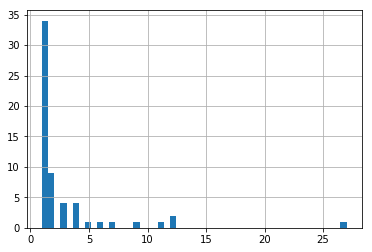

In [18]:
connected_components = list(nx.connected_components(G))
connected_components_sizes = pd.Series([len(cc) for cc in connected_components])
connected_components_sizes.describe()
connected_components_sizes[connected_components_sizes < 1000].hist(bins=50)


## Discovering Communities


In [56]:
import sys
sys.path.append('/Users/kevingmagana/DSI/capstone/capstone-update/Capstone_Proposal/py_scripts')
# from communities import find_communities_n, find_communities_modularity
from networkx.algorithms.community.centrality import girvan_newman



# d = {key:value for key,value in graph_dict.items()}

n = 5
first_few_pairs = {k: graph_dict[k] for k in list(graph_dict)[:n]}
# print(first40pairs)

G = nx.Graph(first_few_pairs)


communities = girvan_newman(G)
# print (len(communities))
# print (communities)
# for i in communities:
#     print(i)
#     break

print(tuple(sorted(c) for c in next(communities)))


(['Austin v. Hamilton (1991)', 'Baker v. McCollan (1979)', 'Barney v. Pulsipher (1998)', 'Caldwell v. Moore (1992)', 'Canton v. Harris (1989)', 'Coleman v. Turpen (1982)', 'Dodds v. Richardson (2010)', 'Draper v. Reynolds (2004)', 'Edwards v. Johnson (2000)', 'Graham v. Connor (1989)', 'Hinton v. City (1993)', 'Hudson v. McMillan (1992)', 'Ingraham v. Wright (1977)', 'Jasper v. Thalacker (1993)', 'Jenkins v. Wood (1996)', 'Johnson v. Jones (1995)', 'Kentucky v. Graham (1985)', 'Lopez v. LeMaster (1999)', 'Michenfelder v. Sumner (1988)', "Monell v. Dep't (1978)", 'Novitsky v. City (2007)', 'PORRO v. BARNES; (2010)', 'Roska v. Peterson (2003)', 'Sacramento v. Lewis (1998)', 'Serna v. Colo. (2006)', 'Trujillo v. Williams (2006)'], ['Alaska v. Aragon (1946)', 'Cruz v. Maurer (2007)', 'FCC v. Pottsville (1940)', 'GARCIA-CARBAJAL v. H. HOLDER (2010)', 'Micheli v. Dir. (1988)', 'Sidabutar v. Gonzales (2007)', 'Solis-Muela v. I.N.S. (1993)', 'Weinberger v. Salfi (1975)'], ['Braxton v. United (

In [57]:
pwd

'/Users/kevingmagana/DSI/capstone/capstone-update/Capstone_Proposal/notebooks'

In [58]:

graph_pos = nx.spring_layout(G)
print(graph_pos)
plt.show()

{'PORRO v. BARNES; (2010)': array([-0.24752662, -0.90608251]), 'GARCIA-CARBAJAL v. H. HOLDER (2010)': array([ 0.36102248, -0.78233267]), 'UNITED STATES v. RENDON-ALAMO (2010)': array([-0.77465254, -0.59421911]), 'ILIEV v. H. HOLDER (2010)': array([-0.71971056,  0.39589096]), 'UNITED STATES v. F. ADAME-OROZCO (2010)': array([ 0.74535311,  0.06647102]), 'CARPIO v. J. HOLDER (2010)': array([-0.27372196,  0.39846514]), 'UNITED STATES v. CRUZ-GARCIA (2010)': array([ 0.71108424, -0.65723269]), 'UNITED STATES v. PENA-MONTES (2009)': array([ 0.29368739,  0.84938502]), 'N-A-M v. H. HOLDER S. C. (2009)': array([-0.23907567, -0.00930782]), 'MENDIOLA v. H. HOLDER (2009)': array([ 0.22404691,  0.15975196]), 'Baker v. McCollan (1979)': array([-0.22792326, -0.9912938 ]), 'Graham v. Connor (1989)': array([-0.32371361, -0.89294027]), 'Austin v. Hamilton (1991)': array([-0.32670824, -0.93454331]), 'Johnson v. Jones (1995)': array([-0.28149322, -0.86056527]), 'Hudson v. McMillan (1992)': array([-0.189171

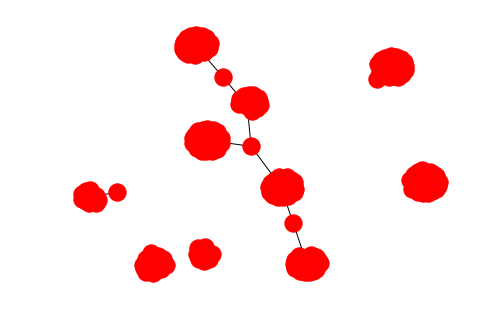

In [59]:
nx.draw(G)
# nx.draw_random(G)
# nx.draw_circular(G)
# nx.draw_spectral(G)

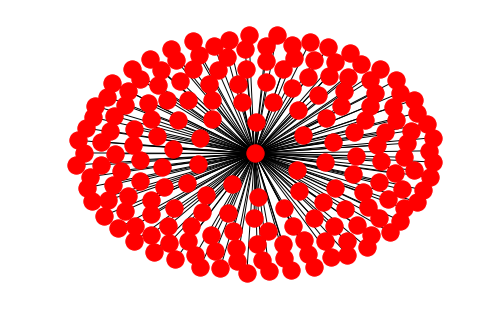

In [72]:
search_result = 'ARAR v. ASHCROFT D. J. J. W. (2009)'

G = nx.Graph(graph_dict)

# print ('# nodes:', G.number_of_nodes())
# print ('# edges:', G.number_of_edges())

search_query = {k: graph_dict[k] for k in list(graph_dict) if k == search_result}

g = nx.Graph(search_query)
community = girvan_newman(g)

# if search_result in graph_dict: 
#     print(G[search_result])

nx.draw(g)


In [76]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

n = 5
first_few_pairs = {k: graph_dict[k] for k in list(graph_dict)[:n]}
# print(first40pairs)

G = nx.Graph(first_few_pairs)



def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

def test(G):
    # to install networkx 2.0 compatible version of python-louvain use:
    # pip install -U git+https://github.com/taynaud/python-louvain.git@networkx2
    from community import community_louvain

    g = G
    partition = community_louvain.best_partition(g)
    pos = community_layout(g, partition)

    nx.draw(g, pos, node_color=partition.values()); plt.show()
    return


# test(G)



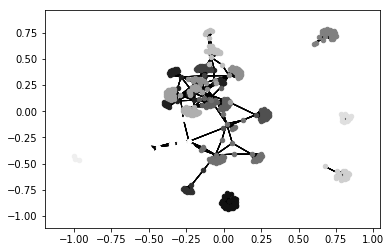

In [107]:
#other example to display a graph with its community :
#better with karate_graph() as defined in networkx examples
#erdos renyi don't have true community structure

import community 

n = 25
first_few_pairs = {k: graph_dict[k] for k in list(graph_dict)[:n]}
# print(first40pairs)

G = nx.Graph(first_few_pairs)

# G = nx.erdos_renyi_graph(30, 0.05)

print(G)
#first compute the best partition

partition = community.best_partition(G)
#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.

for com in set(partition.values()) :
    count += 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20, node_color = str(count / size))
    nx.draw_networkx_edges(G, pos, alpha=0.5)


plt.show()

In [24]:
### Dendogram -- what's it for?? Hiearchical Clustering... but, for what? 
dendo = community.generate_dendrogram(G)
for level in range(len(dendo) - 1):
    print("partition at level", level, "is", partition_at_level(dendo, level))

In [38]:
## Produce the graph where nodes are the communities 
# g = G

n=5
g = nx.complete_graph(2*n)

part = dict([])
for node in g.nodes() :
    try: 
        part[node] = node % 2
    except: 
        continue

ind = community.induced_graph(part, g)
goal = nx.Graph()
goal.add_weighted_edges_from([(0,1,n*n),(0,0,n*(n-1)/2), (1, 1, n*(n-1)/2)])

print(goal)
# nx.is_isomorphic(int, goal)

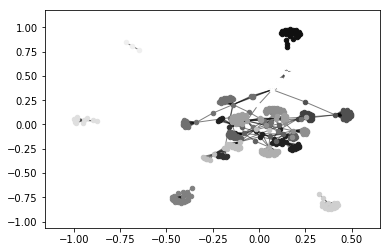

In [108]:

# Compute Modularity 
part = community.best_partition(G)
community.modularity(part, G)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20, node_color = str(count / size))
    
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()


In [109]:
# G.nodes()
print (nx.info(G))


Name: 
Type: Graph
Number of nodes: 407
Number of edges: 444
Average degree:   2.1818


In [110]:
#Create network layout for visualizations
spring_pos = nx.spring_layout(G)

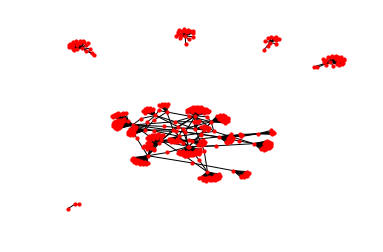

In [111]:
plt.axis("off")
nx.draw_networkx(G, pos = spring_pos, with_labels = False, node_size = 10)

## Community Detection

In [112]:
parts = community.best_partition(G)
values = [parts.get(node) for node in G.nodes()]

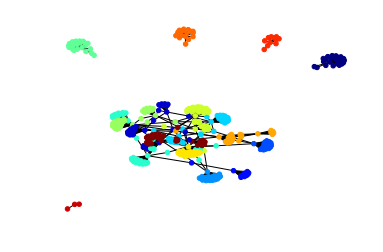

In [113]:
plt.axis("off")
nx.draw_networkx(G, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = 20, with_labels = False)

## Parallel Betweeness Centrality

In [114]:
from multiprocessing import Pool
import itertools


In [115]:
def partitions(nodes, n):
    "Partitions the nodes into n subsets"
    nodes_iter = iter(nodes)
    while True:
        partition = tuple(itertools.islice(nodes_iter,n))
        if not partition:
            return
        yield partition

In [116]:
def btwn_pool(G_tuple):
    return nx.betweenness_centrality_source(*G_tuple)

In [117]:
def between_parallel(G, processes = None):
    p = Pool(processes=processes)
    part_generator = 4*len(p._pool)
    node_partitions = list(partitions(G.nodes(), int(len(G)/part_generator)))
    num_partitions = len(node_partitions)
 
    bet_map = p.map(btwn_pool,
                        zip([G]*num_partitions,
                        [True]*num_partitions,
                        [None]*num_partitions,
                        node_partitions))
 
    bt_c = bet_map[0]
    for bt in bet_map[1:]:
        for n in bt:
            bt_c[n] += bt[n]
    return bt_c

In [118]:
bt = between_parallel(G)
top = 10

max_nodes =  sorted(bt.items(), key = lambda v: -v[1])[:top]
bt_values = [5]*len(G.nodes())
bt_colors = [0]*len(G.nodes())

# print(bt_values)
# print(bt_colors)

for ind, max_key, max_val in enumerate(max_nodes[0:3]):
#     print (max_key), print(max_val)
#     print(max_nodes[ind])
#     bt_values[max_nodes[max_key]] = 150
#     bt_colors[max_key] = 2
    pass
    

plt.axis("off")
nx.draw_networkx(G, pos = spring_pos, cmap = plt.get_cmap("rainbow"), node_color = bt_colors, node_size = bt_values, with_labels = False)

OSError: [Errno 24] Too many open files